In [1]:
library(plyr)
library(dplyr)
library(reshape)
library(reshape2)
library(RColorBrewer)
library(ggplot2)
library(ggrastr)
library(repr)
library(IRdisplay)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:plyr’:

    rename, round_any



Attaching package: ‘reshape2’


The following objects are masked from ‘package:reshape’:

    colsplit, melt, recast




In [2]:
#Cell type annotation of snATAC dataset
#anno=read.table('../data/snATAC/All_225_ATAC_samples_metadata_data_freeze_v7.0.2.withDetailed.tsv',sep='\t',header=T)

#Cell type annotation of sc/snRNA dataset
anno=read.table('../data/snRNA/All_206_RNA_samples_metadata_data_freeze_v7.0.2.withDetailed.tsv',sep='\t',header=T)

#ATAC project color scales
colors=readRDS('../data/Colors_panatac_v2.0.rds')
cell_type_cols=colors$cell_type

In [3]:
cell_type_cols=c(cell_type_cols,'#878787','#01665e','#e5c494','#fc8d62','#f46d43','#4d4d4d','#c994c7','#fcbba1','#7fcdbb','#fc4e2a')
names(cell_type_cols)[43:52]=c('Low quality','Normal squamous cells','Keratinocytes','vSMCs','Skeletal Muscle','Other','Immune','Monocytes','Neutrophils','Pre-B-cells')

anno$cell_type.harmonized.cancer[!(anno$cell_type.harmonized.cancer %in% names(cell_type_cols))]<-'Other'

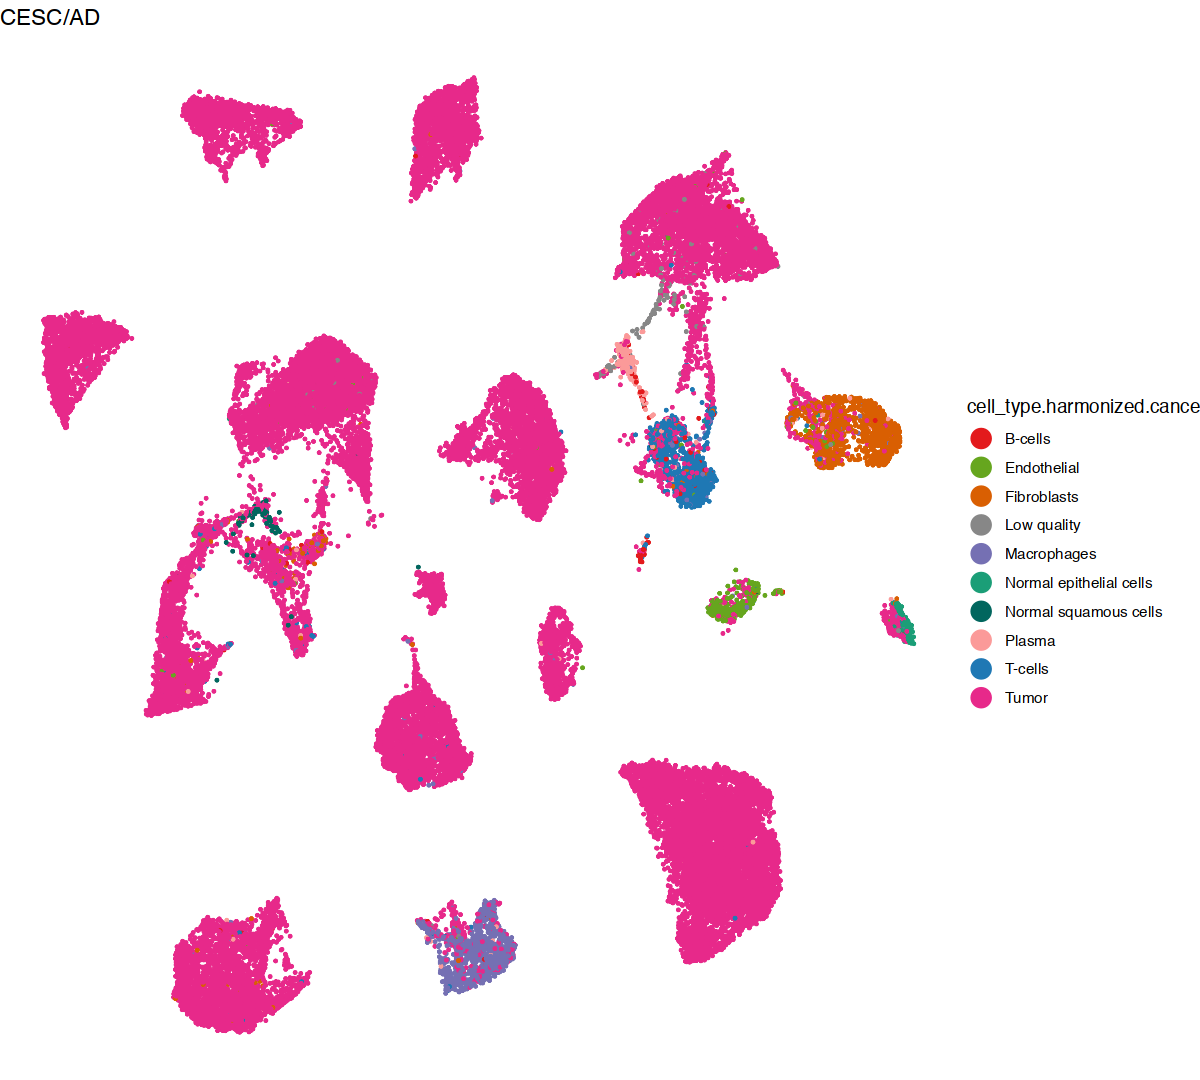

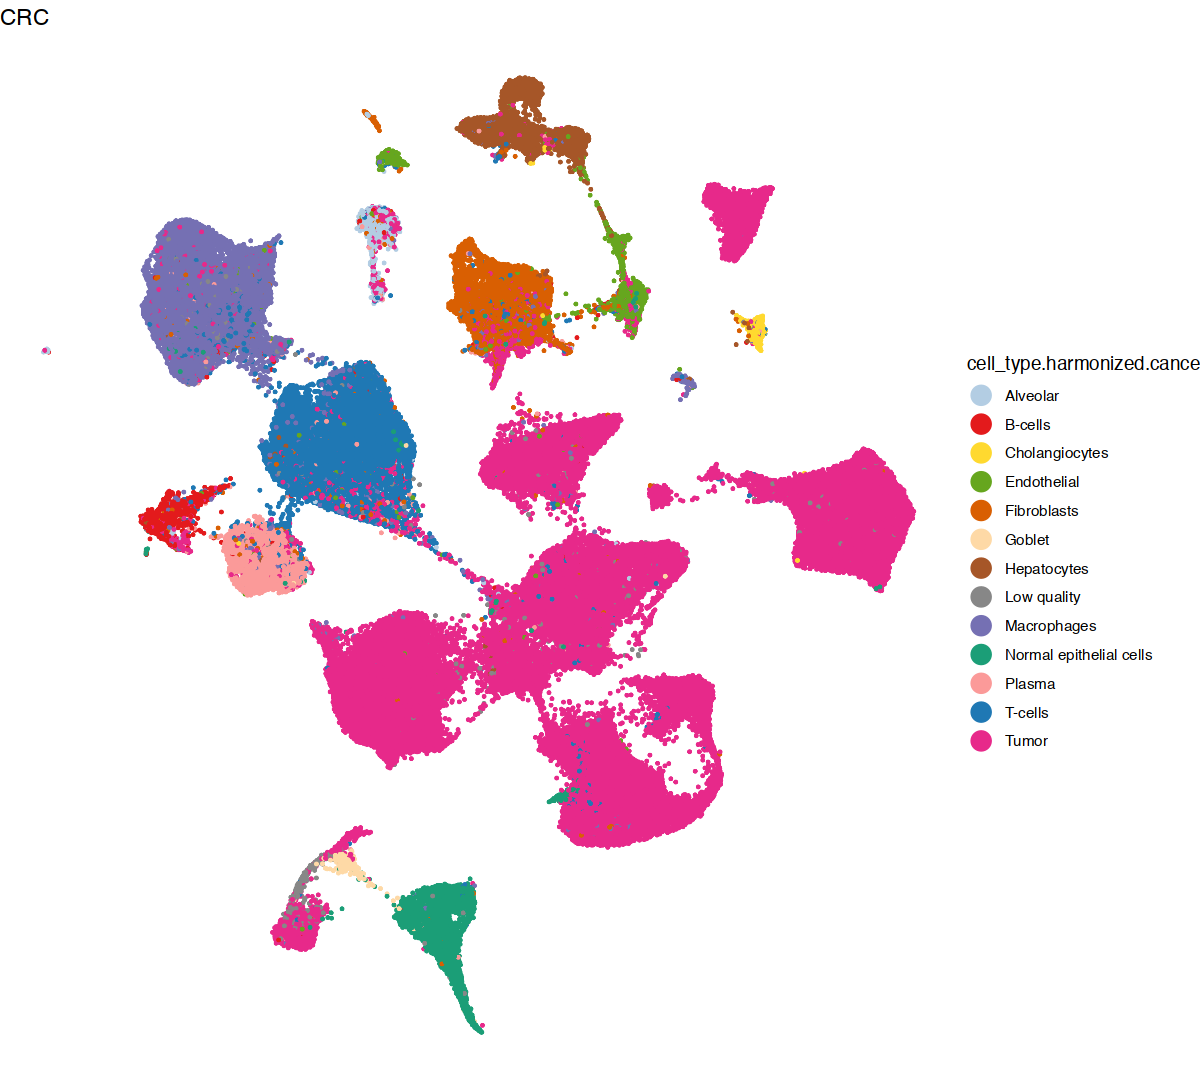

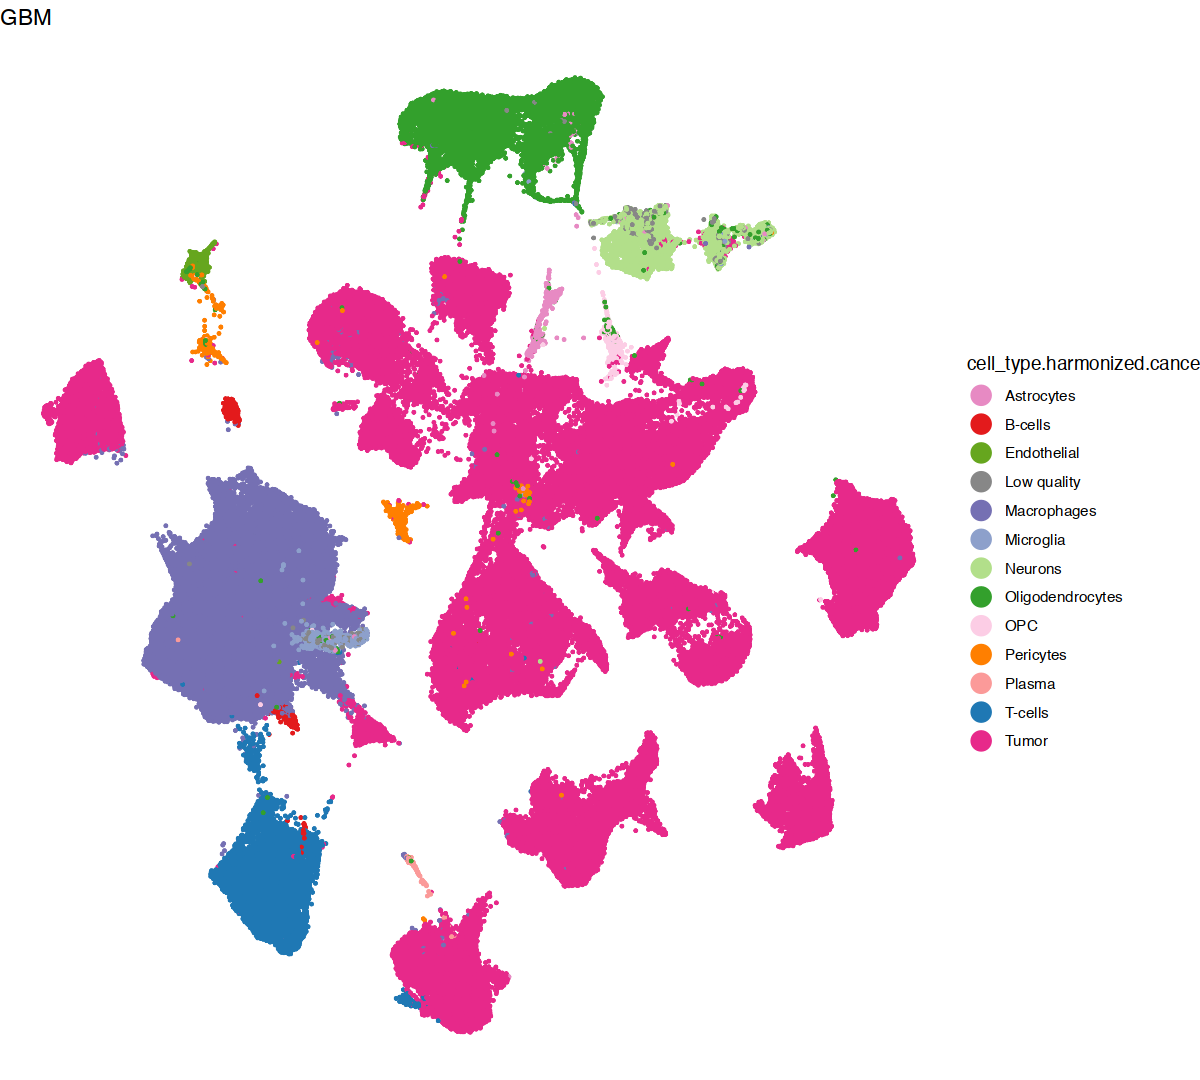

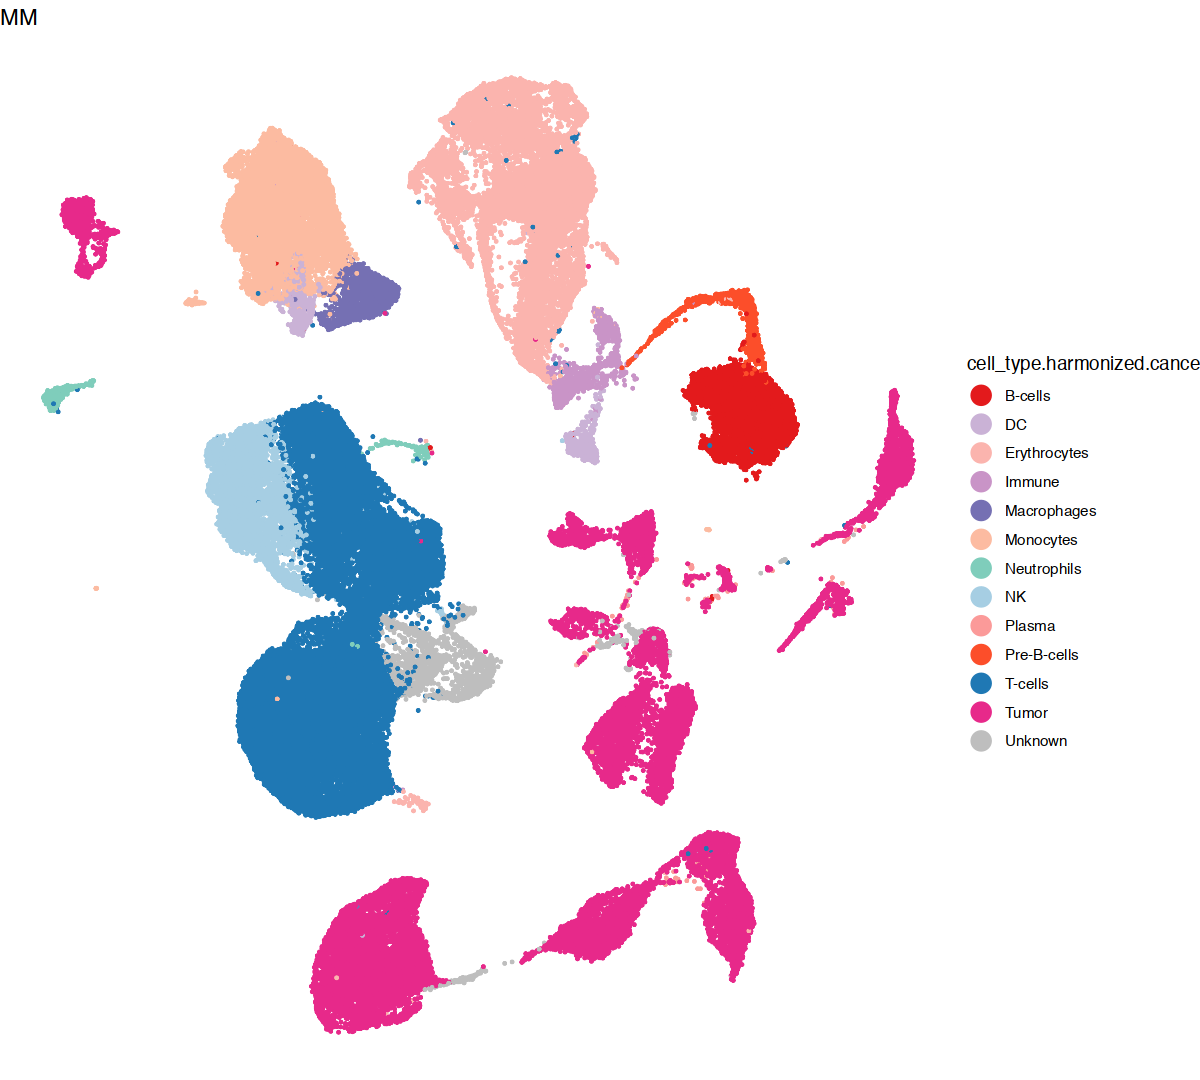

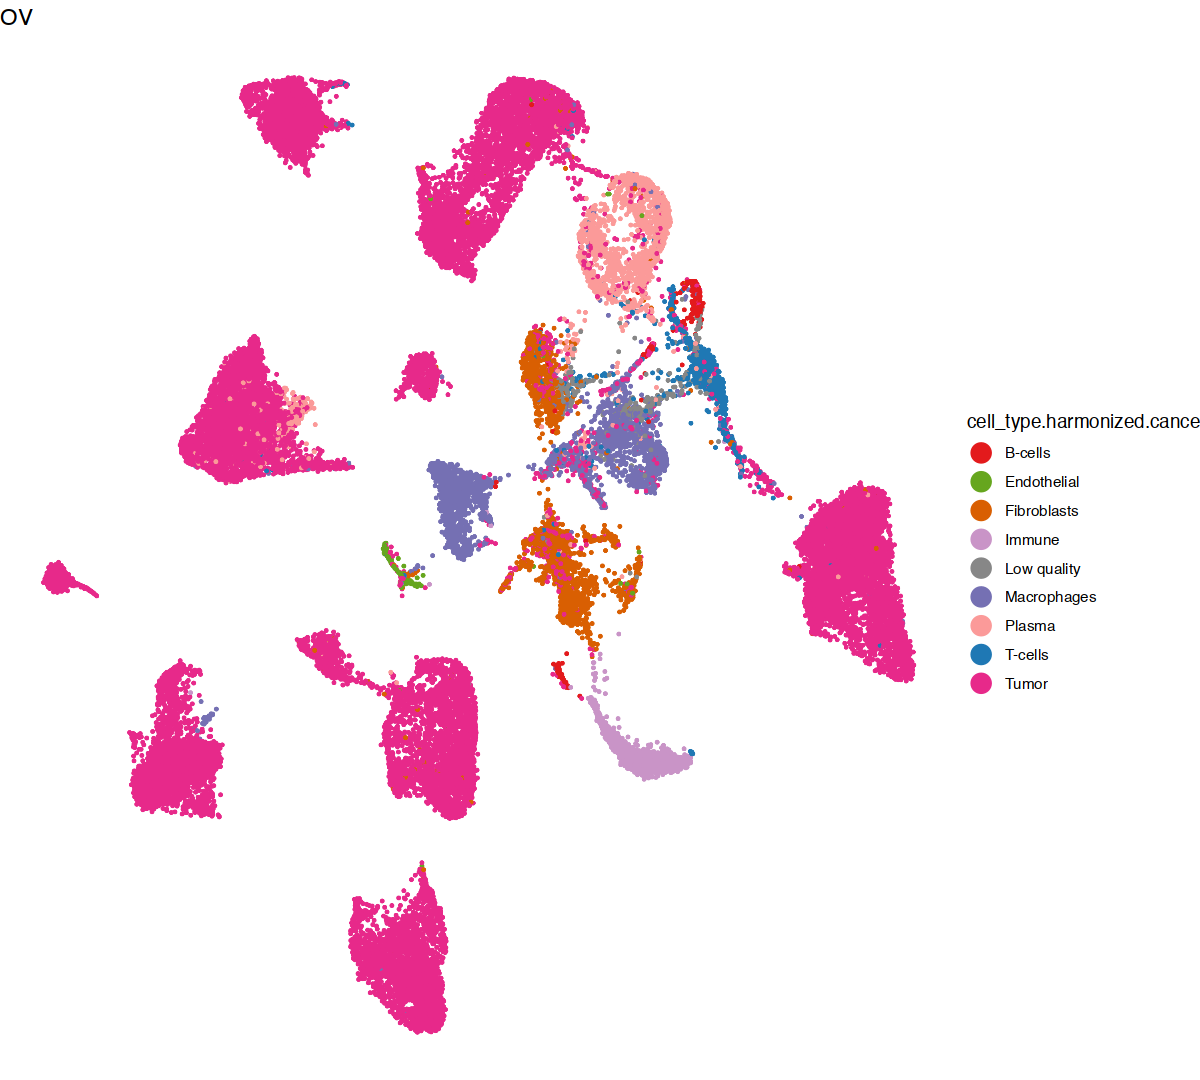

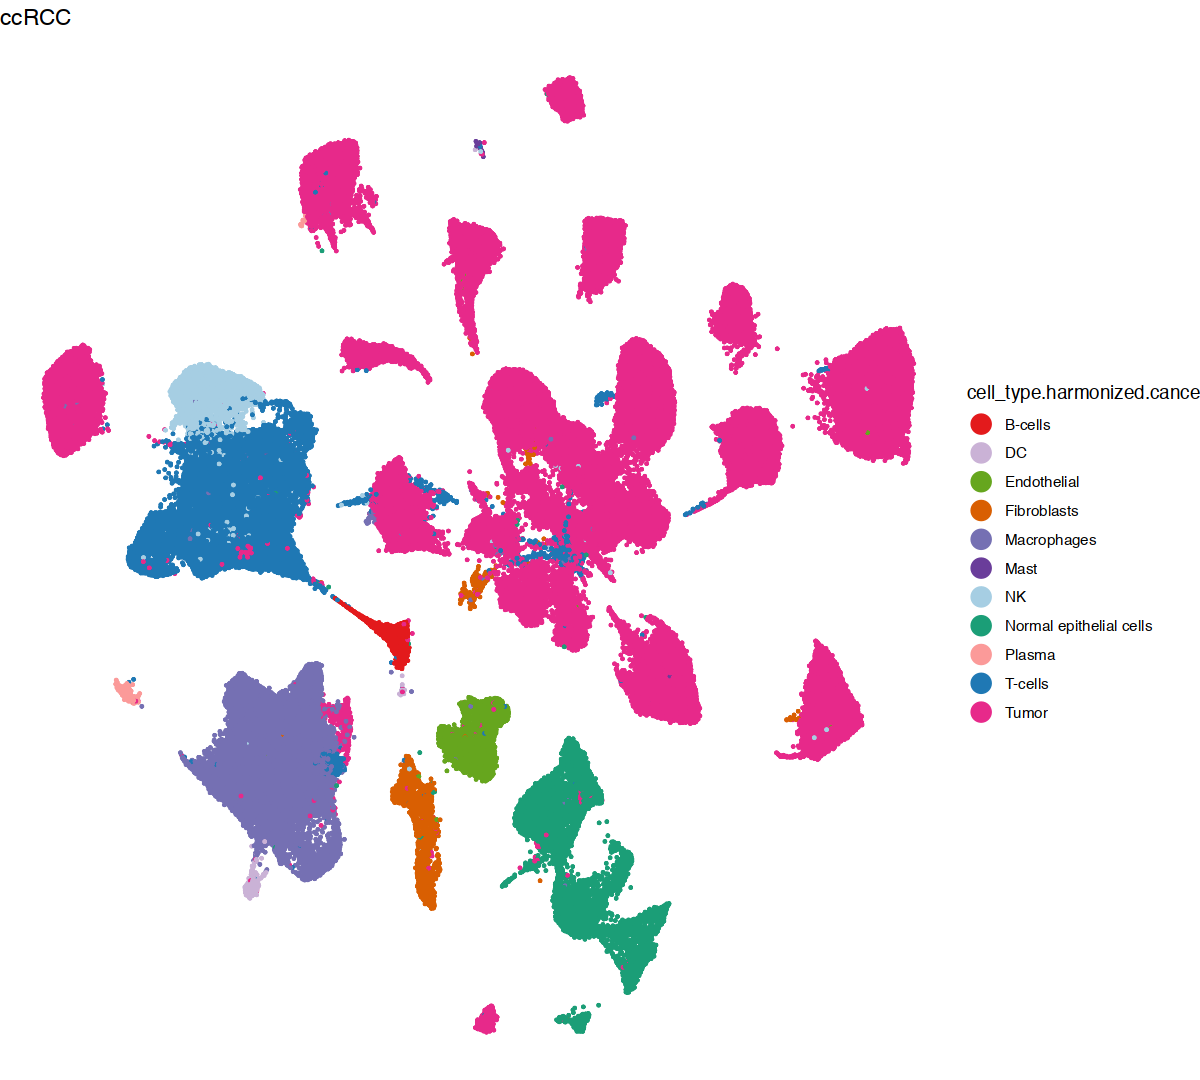

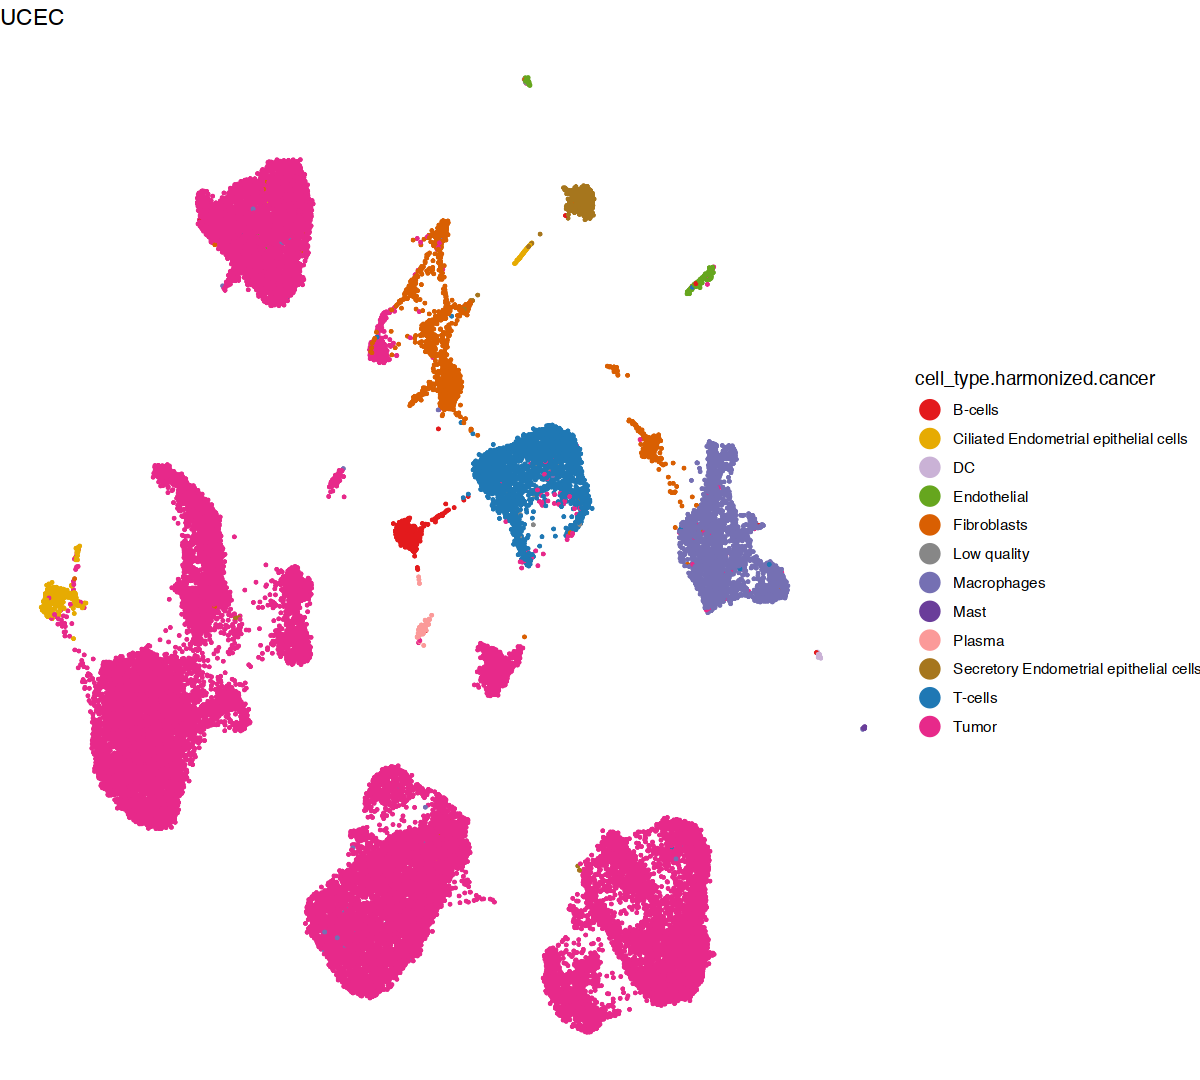

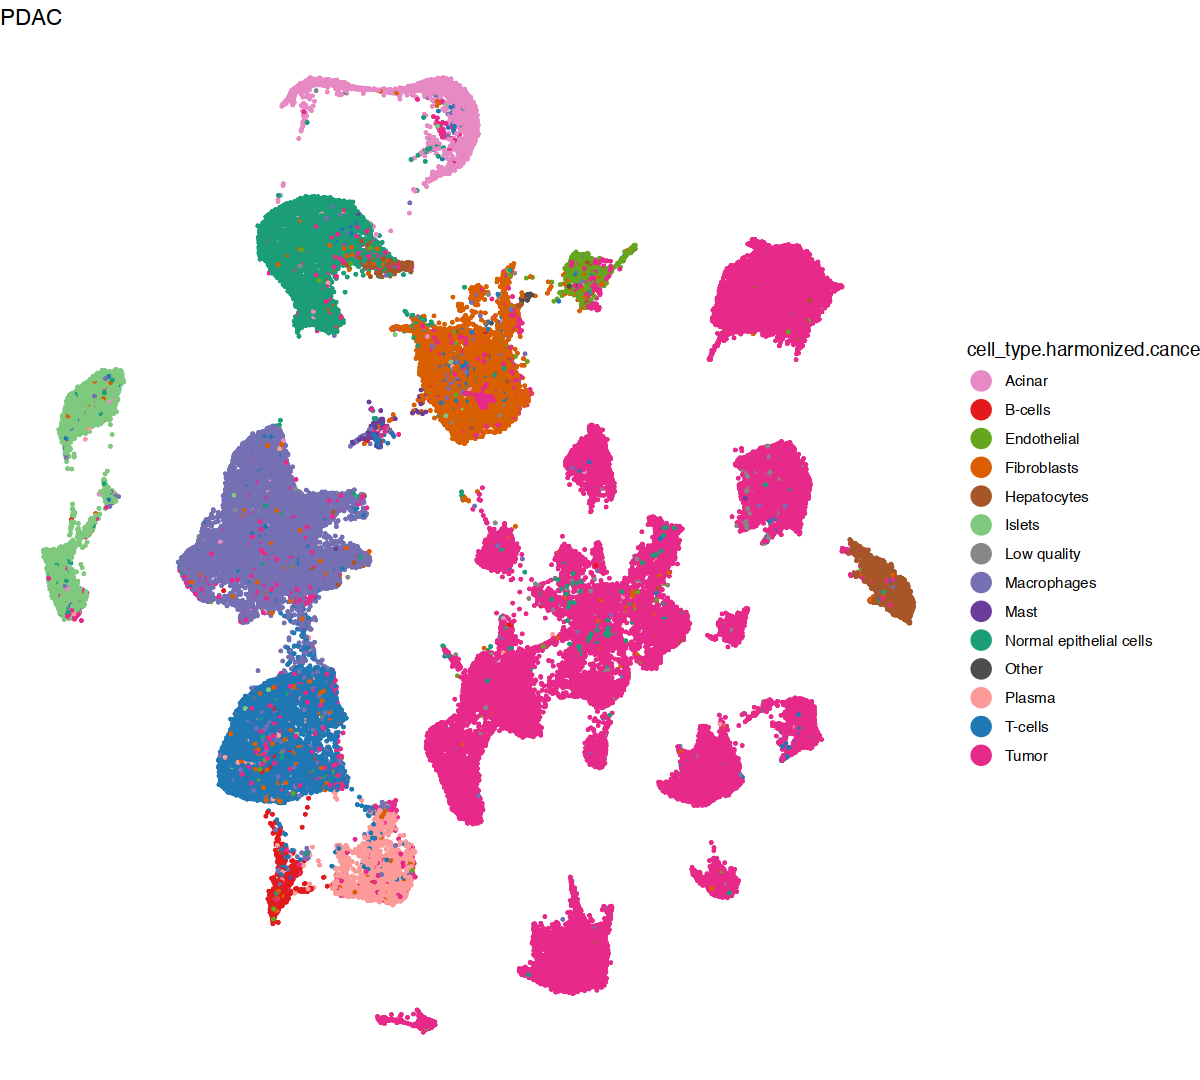

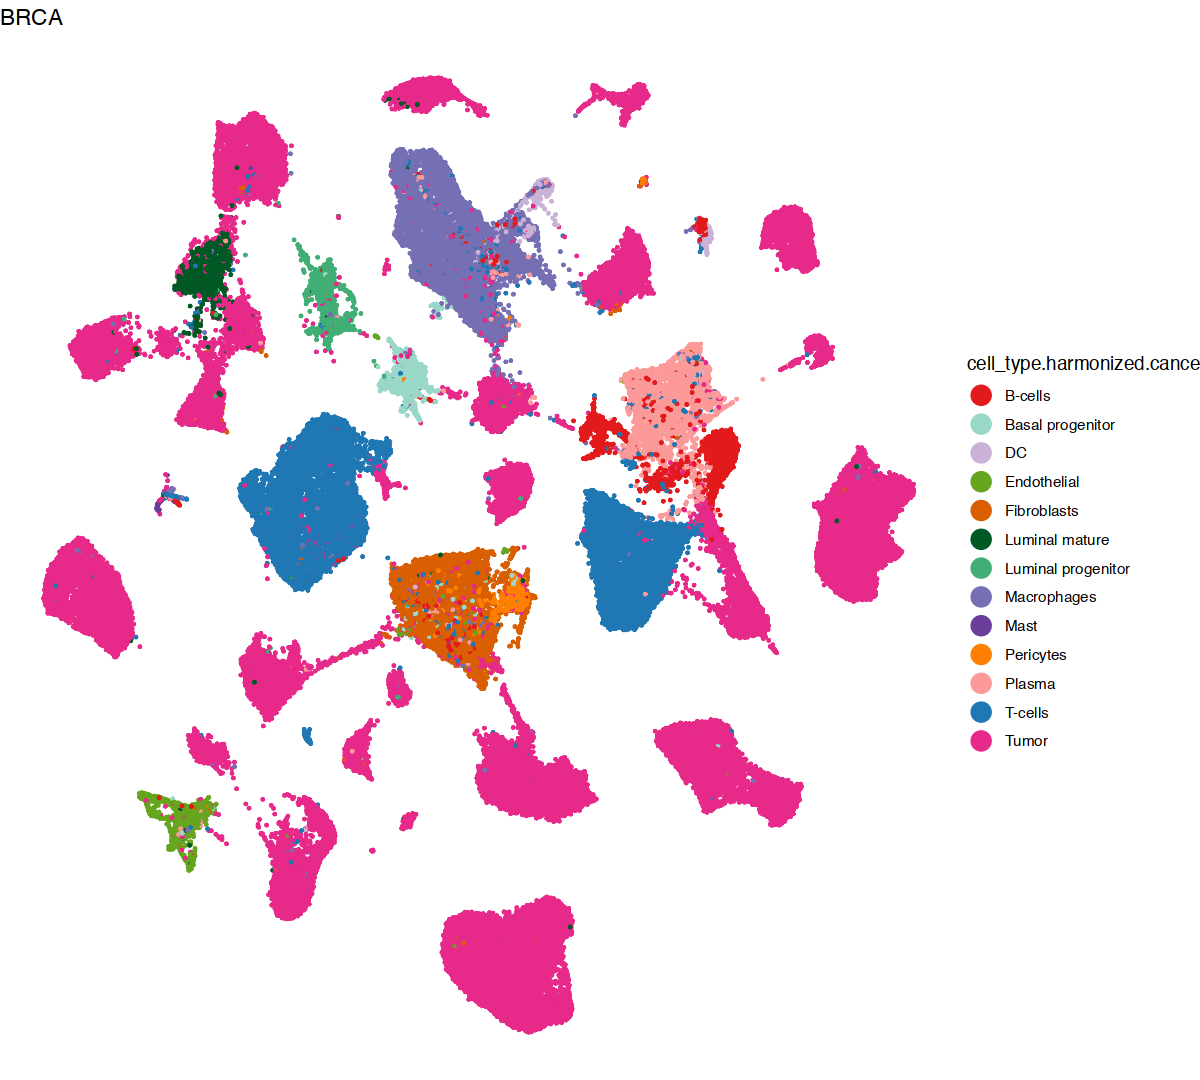

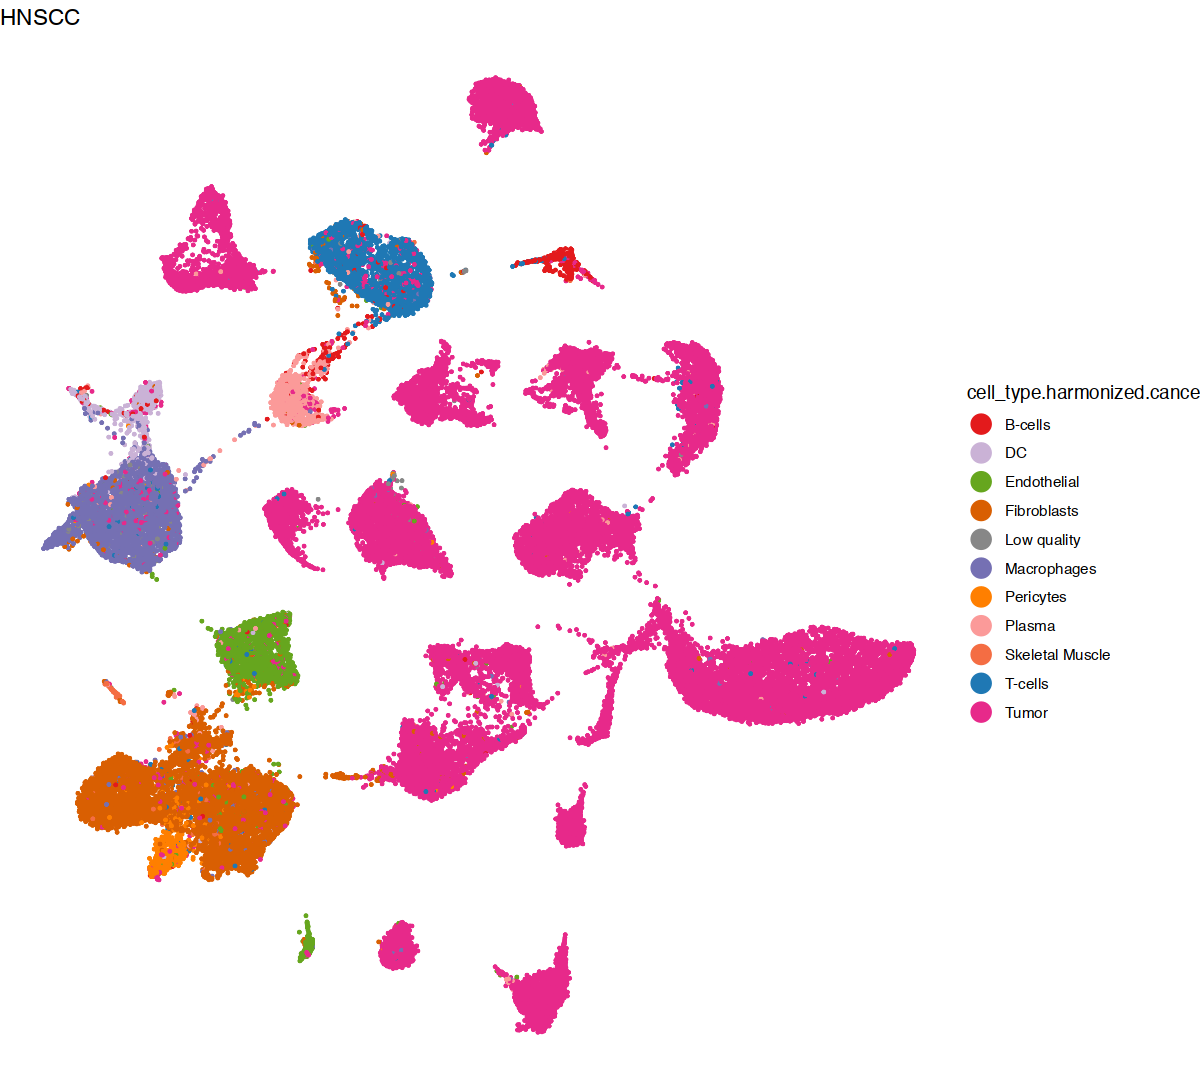

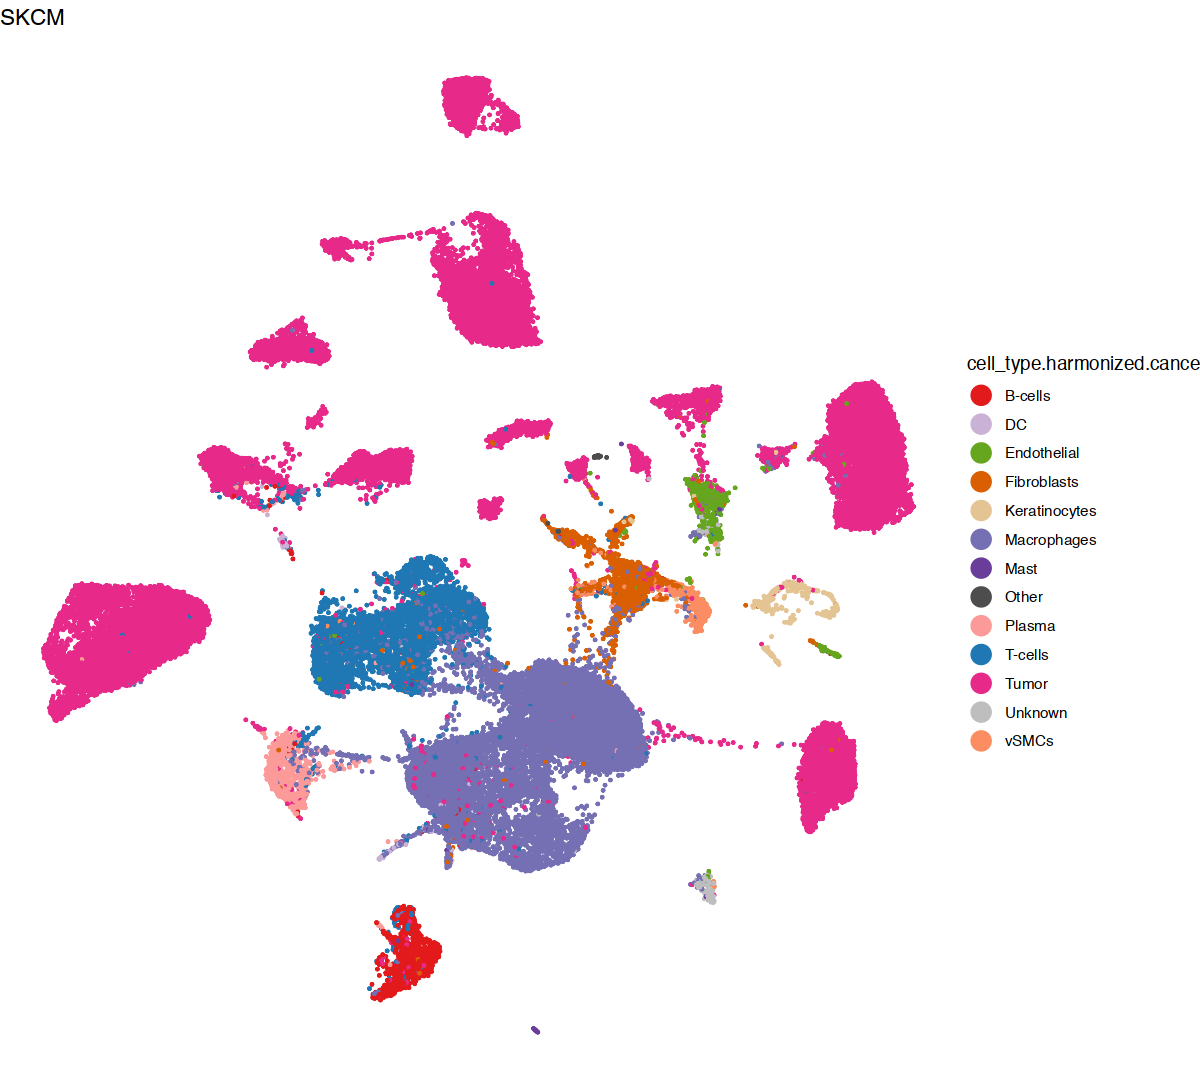

In [4]:
cancers=unique(anno$Cancer)
cancers=c('CESC','CRC','GBM','MM','OV','ccRCC','UCEC','PDAC','BRCA','HNSCC','SKCM')
for (can in cancers){

anno_sel=anno[anno$Cancer==can,]
umap_data=read.table(paste('../data/snRNA/meta.data/',can,'_UMAP_data.tsv',sep=''),sep='\t',header=T)
colnames(umap_data)=c('UMAP_1','UMAP_2','X')

anno_sel=merge(anno_sel,umap_data)
n_anno_sel=nrow(anno_sel)
#print(paste(can,n_anno_sel))


meta_sel=anno_sel %>% dplyr::select ('UMAP_1','UMAP_2','cell_type.harmonized.cancer')

if (can=='CESC'){
    can_v2='CESC/AD'
}else{
    can_v2=can
}
        
p <- ggplot(meta_sel, aes(UMAP_1, UMAP_2)) 
    
p <- p + geom_point_rast(aes(color=cell_type.harmonized.cancer), 
                           alpha = 1,size=0.5)+theme_bw() 
    
p <- p +theme_void()
    
p <- p + scale_color_manual(values=cell_type_cols)
    
p <- p + guides(color = guide_legend(override.aes = list(size = 5,alpha=1) ) ) + ggtitle(can_v2)
                           
    
options(repr.plot.width=10, repr.plot.height=9)
print(p)
}

In [5]:
cancers=unique(anno$Cancer)
cancers=c('SKCM','CESC','CRC','GBM','MM','OV','ccRCC','UCEC','PDAC','BRCA','HNSCC')
for (can in cancers){

anno_sel=anno[anno$Cancer==can,]
n_anno_sel=nrow(anno_sel)

if (can=='CESC'){
    can_v2='CESC/AD'
}else{
    can_v2=can
}


display_markdown(paste(can_v2,n_anno_sel))

}

SKCM 61779

CESC/AD 41857

CRC 136606

GBM 206002

MM 95152

OV 35534

ccRCC 219113

UCEC 39663

PDAC 105131

BRCA 163156

HNSCC 53962

In [6]:
nrow(anno)

[1] 1157955